In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [24]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## EDA

In [25]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [27]:
df.Gender.value_counts(),df.MaritalStatus.value_counts(),df.TypeofContact.value_counts()

(Gender
 Male       2916
 Female     1817
 Fe Male     155
 Name: count, dtype: int64,
 MaritalStatus
 Married      2340
 Divorced      950
 Single        916
 Unmarried     682
 Name: count, dtype: int64,
 TypeofContact
 Self Enquiry       3444
 Company Invited    1419
 Name: count, dtype: int64)

In [28]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [29]:
print('Missing values:')
naf = [f for f in df.columns if df[f].isnull().sum()>=1]
for f in naf:
    print(f,np.round(df[f].isnull().mean()*100,5),'%')

Missing values:
Age 4.62357 %
TypeofContact 0.51146 %
DurationOfPitch 5.13502 %
NumberOfFollowups 0.92062 %
PreferredPropertyStar 0.53191 %
NumberOfTrips 2.86416 %
NumberOfChildrenVisiting 1.35025 %
MonthlyIncome 4.76678 %


In [30]:
df[naf].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [31]:
df.Age.fillna(df.Age.median(), inplace=True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [32]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [33]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [34]:
df.drop('CustomerID',inplace=True,axis=1)
df['TotalVisitings']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)

In [35]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisitings'],
      dtype='object')

## Model Training

In [36]:
X = df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=17)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [37]:
catag = X.select_dtypes(include="object").columns
numer = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numer_ss = StandardScaler()
catag_ohe = OneHotEncoder(drop='first')

ct = ColumnTransformer(
    [
        ("OneHotEncoder", catag_ohe, catag),
        ("StandardScaler", numer_ss, numer)
    ]
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [38]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.457405,0.687618,0.287203,-0.724450,1.503831,-0.633588,-0.070851,0.789354,0.006871,-0.057092
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.457405,2.012046,0.287203,1.780060,1.503831,-0.633588,-0.801796,-1.266858,-0.354770,-0.765758
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.457405,-0.877614,0.287203,0.527805,-1.224191,-0.633588,-1.532740,-1.266858,-0.678701,-0.765758
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720486,0.206008,0.287203,1.780060,-0.678587,1.578313,-0.070851,0.789354,-1.127076,0.651574
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.368459,1.048826,0.287203,-0.724450,-0.678587,1.578313,1.391038,-1.266858,-0.406999,0.651574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.720486,-0.757212,1.283621,-0.724450,0.958227,-0.633588,-0.801796,-1.266858,0.354748,1.360240
3906,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.457405,-0.757212,-0.709215,0.527805,-0.678587,-0.633588,-1.532740,0.789354,-1.078807,-0.765758
3907,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.720486,-0.757212,0.287203,-0.724450,-0.132982,1.578313,-0.801796,-1.266858,-0.114745,-1.474424
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,-0.720486,1.771241,-0.709215,-0.724450,0.412622,1.578313,0.660093,0.789354,1.017316,0.651574


In [39]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720486,0.808021,0.287203,-0.724450,-0.132982,-0.633588,-1.532740,0.789354,-0.382487,0.651574
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.720486,1.891643,0.287203,0.527805,-0.132982,1.578313,-1.532740,-1.266858,-0.469787,-0.057092
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.457405,-0.396004,0.287203,-0.724450,0.412622,-0.633588,0.660093,0.789354,0.852146,0.651574
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.457405,-0.998017,-1.705634,1.780060,-0.132982,-0.633588,0.660093,-1.266858,-0.162637,-0.057092
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.720486,2.132448,1.283621,-0.724450,0.958227,1.578313,-0.801796,0.789354,-0.090045,0.651574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.720486,-0.034797,1.283621,0.527805,-0.132982,1.578313,-1.532740,0.789354,-0.521638,-0.057092
974,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.720486,-0.757212,0.287203,0.527805,1.503831,1.578313,0.660093,-1.266858,0.388875,0.651574
975,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.720486,1.891643,0.287203,-0.724450,-1.224191,-0.633588,-0.070851,0.789354,-0.536722,-1.474424
976,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.368459,-0.877614,0.287203,-0.724450,-0.678587,-0.633588,-0.070851,0.789354,-0.232024,-0.765758


In [40]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score

In [41]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "XG Boost":XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_tpred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('='*35)
    
    print(list(models.keys())[i],':')
    print('Model performance for Training Data:')
    print(f'-Accuracy: {accuracy_score(y_train,y_tpred):.4f}')
    print(f'-F1 score: {f1_score(y_train,y_tpred,average='weighted'):.4f}')
    print(f'-Precision: {precision_score(y_train,y_tpred):.4f}')
    print(f'-Recall: {recall_score(y_train,y_tpred):.4f}')
    print(f'-ROC AUC score: {roc_auc_score(y_train,y_tpred):.4f}')
    
    print('-'*35)
    
    print('Model performance for Test Data:')
    print(f'-Accuracy: {accuracy_score(y_test,y_pred):.4f}')
    print(f'-F1 score: {f1_score(y_test,y_pred,average='weighted'):.4f}')
    print(f'-Precision: {precision_score(y_test,y_pred):.4f}')
    print(f'-Recall: {recall_score(y_test,y_pred):.4f}')
    print(f'-ROC AUC score: {roc_auc_score(y_test,y_pred):.4f}')
    
    
    

Logistic Regression :
Model performance for Training Data:
-Accuracy: 0.8407
-F1 score: 0.8152
-Precision: 0.6914
-Recall: 0.3098
-ROC AUC score: 0.6385
-----------------------------------
Model performance for Test Data:
-Accuracy: 0.8548
-F1 score: 0.8306
-Precision: 0.6757
-Recall: 0.2976
-ROC AUC score: 0.6340
Decision Tree :
Model performance for Training Data:
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-ROC AUC score: 1.0000
-----------------------------------
Model performance for Test Data:
-Accuracy: 0.9192
-F1 score: 0.9195
-Precision: 0.7602
-Recall: 0.7738
-ROC AUC score: 0.8616
Random Forest :
Model performance for Training Data:
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-ROC AUC score: 1.0000
-----------------------------------
Model performance for Test Data:
-Accuracy: 0.9346
-F1 score: 0.9300
-Precision: 0.9333
-Recall: 0.6667
-ROC AUC score: 0.8284
AdaBoost :
Model performance for Training Data:
-Accuracy: 0.841

### Hypermetric Tuning

In [42]:
rfprms = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

lrprms = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

dtreeprms = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5], 
    'max_features':['auto', 'sqrt', 'log2'],
}

aboostprms = {
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

gboostprms= {
    "loss": ['log_loss','deviance','exponential'],
    "criterion": ['friedman_mse','squared_error','mse'],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 8, 15, None, 10]
}

xgboostparams = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
}

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
cv_models=[
    ("LR",LogisticRegression(),lrprms),
    ("RF",RandomForestClassifier(),rfprms),
    ("DTree",DecisionTreeClassifier(),dtreeprms),
    ("ABoost",AdaBoostClassifier(),aboostprms),
    ("GBoost",GradientBoostingClassifier(),gboostprms),
    ("XgBoost",XGBClassifier(),xgboostparams)
]

from sklearn.model_selection import RandomizedSearchCV

model_params={}
for name,model,params in cv_models:
    rscv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    rscv.fit(X_train,y_train)
    model_params[name] = rscv.best_params_
    
for name in model_params:
    print(f"---------------- Best Params for {name} -------------------")
    print(model_params[name])

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for LR -------------------
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
---------------- Best Params for DTree -------------------
{'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'}
---------------- Best Params for ABoost -------------------
{'n_estimators': 70, 'algorithm': 'SAMME'}
---------------- Best Params for GBoost -------------------
{'n_estimators': 200, 'min_samples_split': 15, 'max_depth': 15, 'loss': 'expo

In [47]:
models={
    "Logistic Regression":LogisticRegression(solver='newton-cg',penalty='l2',C=0.1),
    "Random Forest":RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,max_depth=15),
    "Decision Tree":DecisionTreeClassifier(splitter='best',max_features='sqrt',max_depth=4,criterion='gini'),
    "AdaBoost":AdaBoostClassifier(n_estimators=70,algorithm='SAMME'),
    "Gradient Boost":GradientBoostingClassifier(n_estimators=200,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse'),
    "XG Boost":XGBClassifier(n_estimators=300,max_depth=8,learning_rate=0.1,colsample_bytree=1)
    
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_tpred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('='*35)
    
    print(list(models.keys())[i],':')
    print('Model performance for Training Data:')
    print(f'-Accuracy: {accuracy_score(y_train,y_tpred):.4f}')
    print(f'-F1 score: {f1_score(y_train,y_tpred,average='weighted'):.4f}')
    print(f'-Precision: {precision_score(y_train,y_tpred):.4f}')
    print(f'-Recall: {recall_score(y_train,y_tpred):.4f}')
    print(f'-ROC AUC score: {roc_auc_score(y_train,y_tpred):.4f}')
    
    print('-'*35)
    
    print('Model performance for Test Data:')
    print(f'-Accuracy: {accuracy_score(y_test,y_pred):.4f}')
    print(f'-F1 score: {f1_score(y_test,y_pred,average='weighted'):.4f}')
    print(f'-Precision: {precision_score(y_test,y_pred):.4f}')
    print(f'-Recall: {recall_score(y_test,y_pred):.4f}')
    print(f'-ROC AUC score: {roc_auc_score(y_test,y_pred):.4f}')
    

Logistic Regression :
Model performance for Training Data:
-Accuracy: 0.8404
-F1 score: 0.8118
-Precision: 0.7105
-Recall: 0.2872
-ROC AUC score: 0.6297
-----------------------------------
Model performance for Test Data:
-Accuracy: 0.8517
-F1 score: 0.8242
-Precision: 0.6716
-Recall: 0.2679
-ROC AUC score: 0.6203
Random Forest :
Model performance for Training Data:
-Accuracy: 0.9995
-F1 score: 0.9995
-Precision: 1.0000
-Recall: 0.9973
-ROC AUC score: 0.9987
-----------------------------------
Model performance for Test Data:
-Accuracy: 0.9448
-F1 score: 0.9422
-Precision: 0.9254
-Recall: 0.7381
-ROC AUC score: 0.8629
Decision Tree :
Model performance for Training Data:
-Accuracy: 0.8281
-F1 score: 0.7797
-Precision: 0.7500
-Recall: 0.1596
-ROC AUC score: 0.5735
-----------------------------------
Model performance for Test Data:
-Accuracy: 0.8395
-F1 score: 0.7999
-Precision: 0.6170
-Recall: 0.1726
-ROC AUC score: 0.5752
AdaBoost :
Model performance for Training Data:
-Accuracy: 0.840

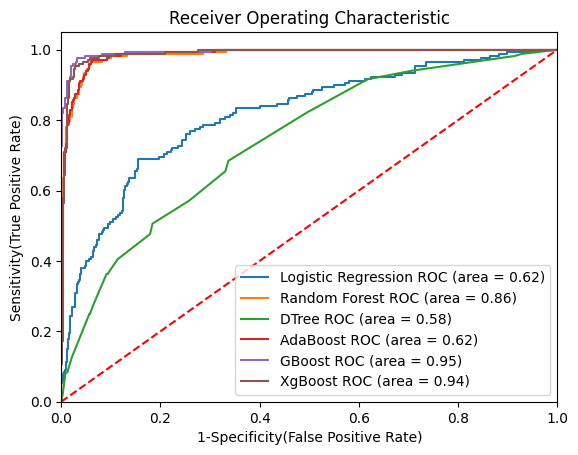

In [48]:
plt.figure()

auc_models = [
{
    'label': 'Logistic Regression',
    'model':LogisticRegression(solver='newton-cg',penalty='l2',C=0.1),
    'auc':  0.6203
},
{
    'label': 'Random Forest',
    'model':RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),
    'auc':  0.8629
},
{
    'label': 'DTree',
    'model':DecisionTreeClassifier(splitter='best',max_features='sqrt',max_depth=5,criterion='entropy'),
    'auc':  0.5752
},
{
    'label': 'AdaBoost',
    'model':RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),
    'auc':  0.6194
},
{
    'label': 'GBoost',
    'model':GradientBoostingClassifier(n_estimators=200,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse'),
    'auc':  0.9468
},
{
    'label': 'XgBoost',
    'model':XGBClassifier(n_estimators=300,max_depth=8,learning_rate=0.1,colsample_bytree=1),
    'auc':  0.9384
}
    
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 